In [21]:
#In the last file I had multiple libs that I import twice
import nltk
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from collections import Counter
import os
import glob
import re

%matplotlib inline

## Importing Data Into DataFrames

#### Convote

In [2]:
fil = open("../data/convote_v1.1/data_stage_one/development_set/052_400011_0327014_DON.txt", 'r')
statinfo = os.stat("../data/convote_v1.1/data_stage_one/development_set/052_400011_0327014_DON.txt")
#putting all of the convote stage one data into a pandas dataframe
path = "../data/convote_v1.1/data_stage_one/development_set/"
convote = pd.DataFrame([[1, 2, 'stuff']], columns=['Party', 'Size', 'Speech'])
i = 0
for filename in glob.glob(os.path.join(path, '*.txt')):
    tempFil = open(filename, 'r')
    indicator = (filename[-7:-4])
    statinfo = os.stat(filename)
    s = int(statinfo.st_size)
    party = 0
    #democrat = 0, republican = 1
    if indicator[0] == 'D':
        party = 0
    else:
        party = 1
    convote.loc[i] = ([party, s, tempFil.read()])
    i += 1  
convote.head()

,Party,Size,Speech
0,0,5776,"mr. chairman , i thank the gentlewoman for yie..."
1,0,3301,"mr. chairman , i want to thank my good friend ..."
2,0,1704,"mr. chairman , i rise to make two fundamental ..."
3,0,1568,"mr. chairman , reclaiming my time , let me mak..."
4,0,1186,"mr. chairman , i thank my distinguished collea..."


## Searching For Features
Looking for any statistically significant features in the data sets. 

### Current Datasets Tested
1. Convote

In [3]:
def getTotalAverages(df, x):
    """
    This function goes through the pandas dataframe to calculate the averages of the total dataframe.
    These averages include, length of speeches, total democrats, total republicans
    df: a pandas dataframe
    x: speech part of dataframe
    """
    totalDem, totalRepub, averageWordCount, averageDemWord, averageRepubWord = 0, 0, [], [], []
    
    for index, row in df.iterrows():
        if row["Party"] == 0: 
            totalDem += 1
            averageWordCount.append(len(row[x]))
            averageDemWord.append(len(row[x]))
        else: 
            totalRepub += 1
            averageWordCount.append(len(row[x]))
            averageRepubWord.append(len(row[x]))
            
    print("Total Democrats in Dataframe: ", totalDem)
    print("Total Republicans in Dataframe: ", totalRepub)
    print("Average Word count of speeches in Dataframe: ", (np.average(averageWordCount)))
    print("Average Word count of Democratic speeches in Dataframe:", np.average(averageDemWord), np.std(averageDemWord))
    print("Average Word count of Republican speeches in Dataframe:", np.average(averageRepubWord), np.std(averageRepubWord))
    
    #plotting these, might have to modifiy this based on the data
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    axs[0].bar(['Democrat', 'Republican'], [totalDem, totalRepub], align='center', alpha=0.5)
    axs[0].set_title('Total # of Speakers by Party')
    axs[1].bar(['Total', 'Democratic', 'Republican'], 
                   [np.average(averageWordCount), np.average(averageDemWord), np.average(averageRepubWord)],
                   align='center', alpha=0.5)
    axs[1].set_title('Average # of Words by a Speaker by Party')
    return averageWordCount, averageDemWord, averageRepubWord

Total Democrats in Dataframe:  335
Total Republicans in Dataframe:  367
Average Word count of speeches in Dataframe:  1678.2549857549857
Average Word count of Democratic speeches in Dataframe: 1970.2149253731343 6121.178940325037
Average Word count of Republican speeches in Dataframe: 1411.7520435967303 2508.2172834988637


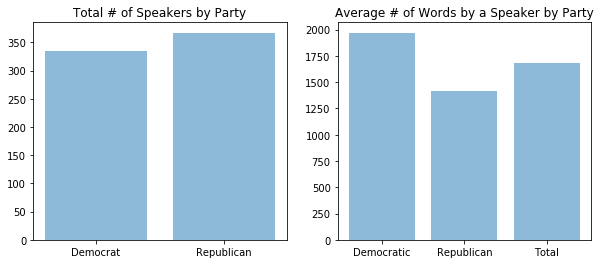

In [4]:
speechAvg = getTotalAverages(convote, "Speech")

In [5]:
def showDist(distList):
    fig, axs = plt.subplots(ncols=len(distList), figsize=(24, 8))
    for i in range(len(distList)): 
        sns.distplot(distList[i], ax=axs[i]).set_title('Distribution of Data')

c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


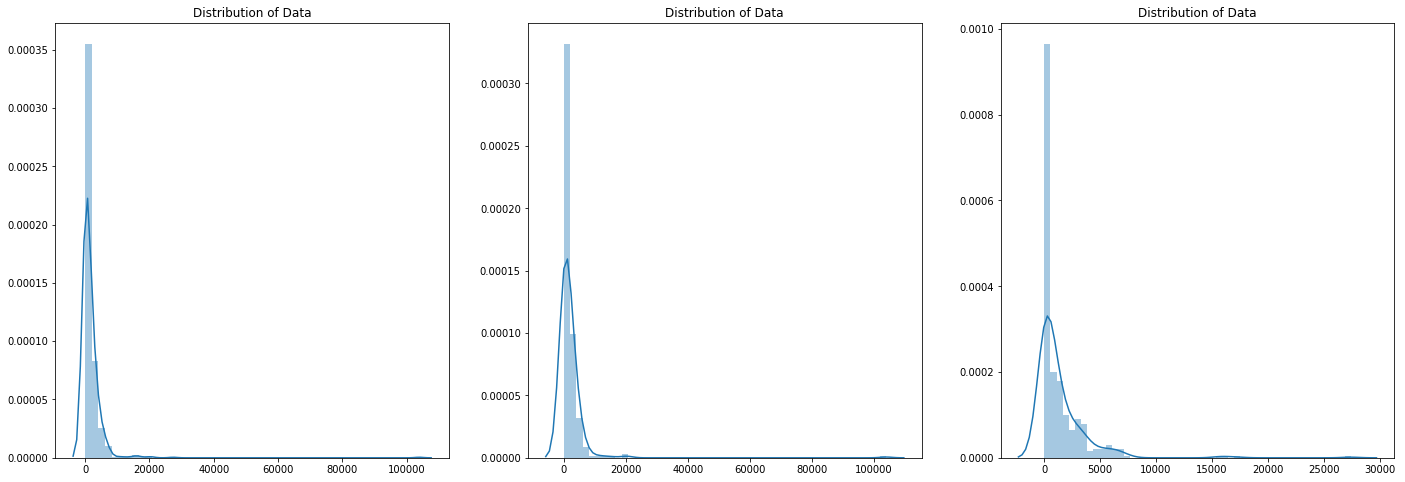

In [6]:
showDist(speechAvg)

In [7]:
import textatistic
def getReadingScores(df):
    #flesch_reading_ease
    #flesch_kincaid_grade
    dem_reading_ease = []
    repub_reading_ease = []
    dem_grade = []
    repub_grade = []
    for index, row in df.iterrows():
        text = row["Speech"]
        if row["Party"] == 0: 
            #dems
            dem_reading_ease.append(textatistic.flesch_score(text))
            dem_grade.append(textatistic.fleschkincaid_score(text))
        else: 
            #repub
            repub_reading_ease.append(textatistic.flesch_score(text))
            repub_grade.append(textatistic.fleschkincaid_score(text))
    print("Democratic Reading Ease (Mean, Standard Distorbution):", np.average(dem_reading_ease), np.std(dem_reading_ease))
    print("Republican Reading Ease (Mean, Standard Distorbution):", np.average(repub_reading_ease), np.std(repub_reading_ease))
    print("Democratic Grade (Mean, Standard Distorbution):", np.average(dem_grade), np.std(dem_grade))
    print("Republican Grade (Mean, Standard Distorbution):", np.average(repub_grade), np.std(repub_grade))
    return dem_reading_ease, repub_reading_ease, dem_grade, repub_grade

In [8]:
gradeEase = getReadingScores(convote)

Democratic Reading Ease (Mean, Standard Distorbution): 75.36941612014661 14.423947937986975
Republican Reading Ease (Mean, Standard Distorbution): 75.28388055615589 13.573521864503252
Democratic Grade (Mean, Standard Distorbution): 6.020825359741582 3.345638974016681
Republican Grade (Mean, Standard Distorbution): 5.909828398056395 3.1090021079873793


c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


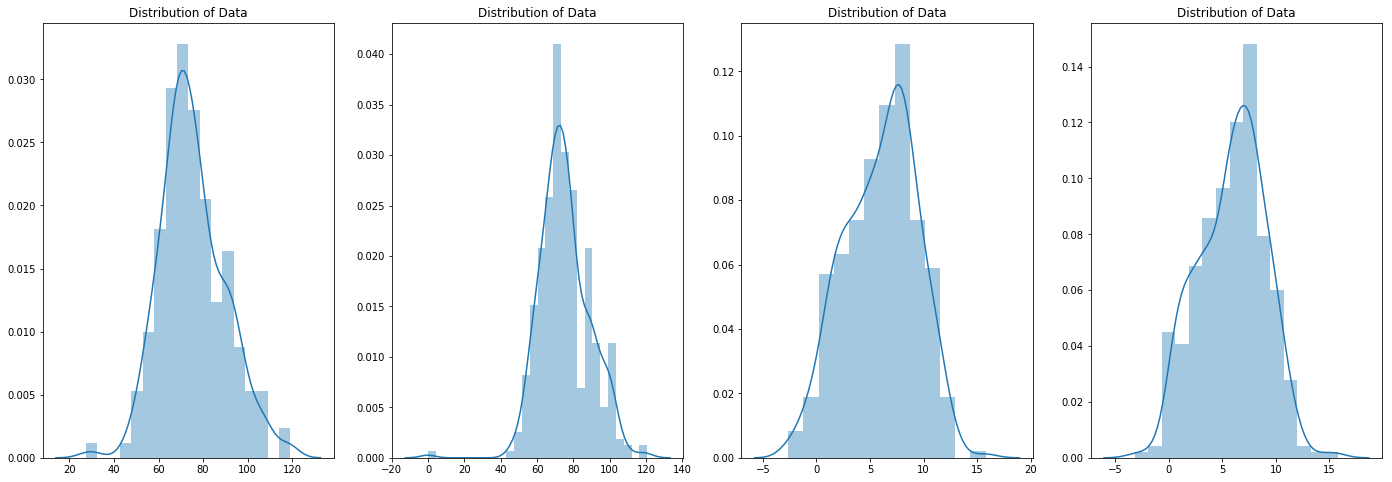

In [9]:
showDist(gradeEase)

### Sentiment Analysis

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Taber
[nltk_data]     Fisher\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def nltk_sentiment(sentence):
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [12]:
def getSentiment(df):
    #flesch_reading_ease
    #flesch_kincaid_grade
    dem_sent_neg = []
    dem_sent_pos = []
    dem_sent_neu = []
    dem_sent_compound = []
    repub_sent_neg = []
    repub_sent_pos = []
    repub_sent_neu = []
    repub_sent_compound = []
    for index, row in df.iterrows():
        text = row["Speech"]
        if row["Party"] == 0: 
            #dems
            tempdic = (nltk_sentiment(text))
            if len(tempdic) > 0:
                dem_sent_neg.append((tempdic['neg']))
                dem_sent_pos.append((tempdic['pos']))
                dem_sent_neu.append((tempdic['neu']))
                dem_sent_compound.append((tempdic['compound']))
        else: 
            #repub
            tempdic = (nltk_sentiment(text))
            if len(tempdic) > 0:
                repub_sent_neg.append((tempdic['neg']))
                repub_sent_pos.append((tempdic['pos']))
                repub_sent_neu.append((tempdic['neu']))
                repub_sent_compound.append((tempdic['compound']))
                
    dem = [np.average(dem_sent_neg), np.average(dem_sent_pos), np.average(dem_sent_neu), np.average(dem_sent_compound)]
    repub = [np.average(repub_sent_neg), np.average(repub_sent_pos), np.average(repub_sent_neu), np.average(repub_sent_compound)]
    print("Democratic Sentiment Negitive (Mean, Standard Distorbution):", np.average(dem_sent_neg), np.std(dem_sent_neg))
    print("Democratic Sentiment Positive (Mean, Standard Distorbution):", np.average(dem_sent_pos), np.std(dem_sent_pos))
    print("Democratic Sentiment Neutral (Mean, Standard Distorbution):", np.average(dem_sent_neu), np.std(dem_sent_neu))
    print("Democratic Sentiment Compound (Mean, Standard Distorbution):", np.average(dem_sent_compound), np.std(dem_sent_compound))
    print("Republican Sentiment Negitive (Mean, Standard Distorbution):", np.average(repub_sent_neg), np.std(repub_sent_neg))
    print("Republican Sentiment Positive (Mean, Standard Distorbution):", np.average(repub_sent_pos), np.std(repub_sent_pos))
    print("Republican Sentiment Neutral (Mean, Standard Distorbution):", np.average(repub_sent_neu), np.std(repub_sent_neu))
    print("Republican Sentiment Compound (Mean, Standard Distorbution):", np.average(repub_sent_compound), np.std(repub_sent_compound))
    categorical_1 = ['Neg', 'Pos', 'Neu', 'Comp']
    colors        = ['blue', 'red']
    numerical = [dem, repub]
    number_groups = len(numerical) 
    bin_width = 1.0/(number_groups+1)
    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(number_groups):
        ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
               height=numerical[i],
               width=bin_width,
               color=colors[i],
               align='center')
    ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
    # number_groups/(2*(number_groups+1)): offset of xticklabel
    ax.set_xticklabels(categorical_1)
    ax.legend(['Dem', 'Repub'], facecolor='w')
    ax.set_title("Averages of Sentiment Across Parties")
    plt.show()
    return dem_sent_neg, dem_sent_pos, dem_sent_neu, dem_sent_compound, repub_sent_neg, repub_sent_pos, repub_sent_neu, repub_sent_compound


Democratic Sentiment Negitive (Mean, Standard Distorbution): 0.05040298507462687 0.06404659211260645
Democratic Sentiment Positive (Mean, Standard Distorbution): 0.0807223880597015 0.07730944183786509
Democratic Sentiment Neutral (Mean, Standard Distorbution): 0.8688835820895523 0.09741305284601533
Democratic Sentiment Compound (Mean, Standard Distorbution): 0.29560985074626867 0.6126490367261425
Republican Sentiment Negitive (Mean, Standard Distorbution): 0.03453133514986376 0.05040391051515845
Republican Sentiment Positive (Mean, Standard Distorbution): 0.07292098092643053 0.07232854778098274
Republican Sentiment Neutral (Mean, Standard Distorbution): 0.8925640326975478 0.0919427354838897
Republican Sentiment Compound (Mean, Standard Distorbution): 0.2908098092643052 0.5575028526819078


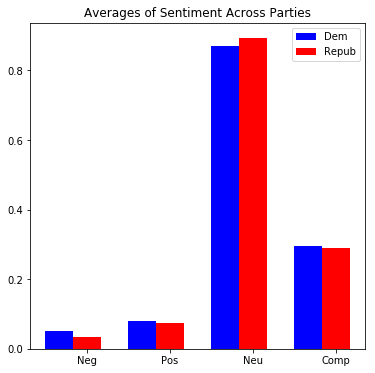

In [13]:
sentimentScores = getSentiment(convote)

##### What do this numbers mean? 

The Vader sentiment analyzer that we are using scores documents based off the percentage positive or negitive.  For example if a document comes back with a dictionary that looks like score = {'neg': .2, 'pos': .6, 'neu': .2, 'comp': .65} This means that the document is rated as 20% negetive, 60% posititve, 20% neutral. The compound rating is a normalized numbers between -1 and 1 for negitive and positive respectivly. 

For this data it looks as though on average most speeches are around 80% neural and the compound score is slighly positive. 

c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


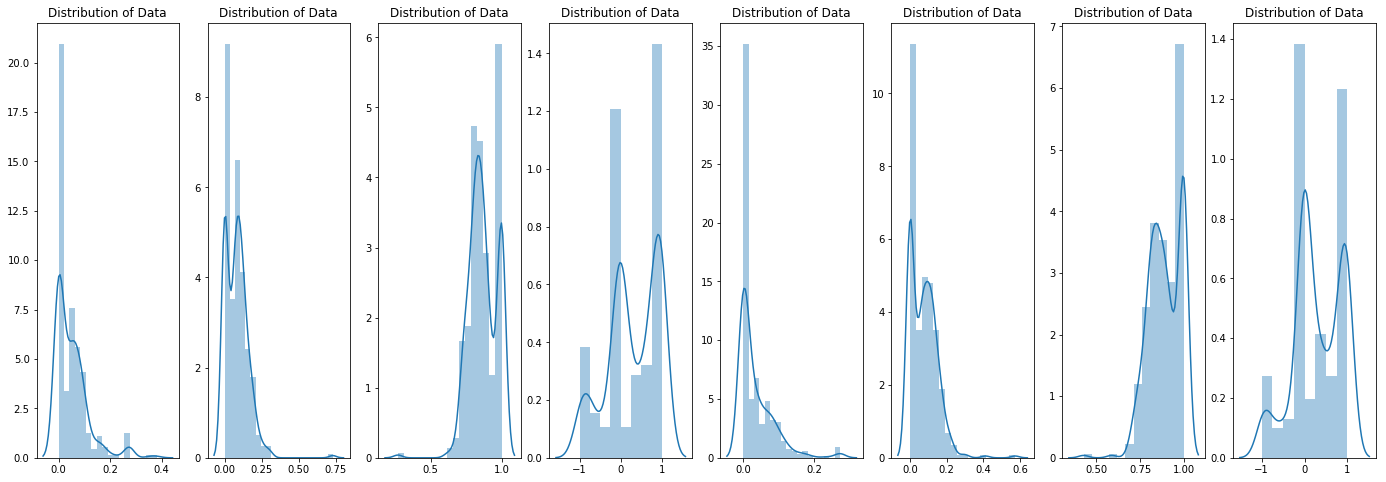

In [14]:
showDist(sentimentScores)

### Is the data normal? 

From the distrobution plots it does not look like we can treat this data as normal, instead we need to figure out a non-paramentric way to test the significance

### Is the Data significant? (p < .1 or better p < .05)

In [15]:
from scipy.stats import mannwhitneyu

print("Convote P-values:")
#Compound Sentiment
stat, p = mannwhitneyu(sentimentScores[3], sentimentScores[7])
print("Compound Sentiment p-value:", p)

#Negitive Sentiment
stat, p = mannwhitneyu(sentimentScores[0], sentimentScores[4])
print("Negitive Sentiment p-value:", p)

#Positive Sentiment
stat, p = mannwhitneyu(sentimentScores[1], sentimentScores[5])
print("Positive Sentiment p-value:", p)

#Neutral Sentiment
stat, p = mannwhitneyu(sentimentScores[2], sentimentScores[6])
print("Neutral Sentiment p-value:", p)

#Reading Ease
stat, p = mannwhitneyu(gradeEase[0], gradeEase[1])
print("Reading Ease p-value:", p)

#Reading Grade
stat, p = mannwhitneyu(gradeEase[2], gradeEase[3])
print("Grade Level p-value:", p)

#speechAvg
stat, p = mannwhitneyu(speechAvg[1], speechAvg[2])
print("Average words in speeches p-value:", p)

Convote P-values:
Compound Sentiment p-value: 0.46808490175865536
Negitive Sentiment p-value: 0.00028754005614272955
Positive Sentiment p-value: 0.09399863247107493
Neutral Sentiment p-value: 0.0003945629711725275
Reading Ease p-value: 0.4250048568987349
Grade Level p-value: 0.25843516449447534
Average words in speeches p-value: 0.046751706766035794


### Politician Social Media

There is a slight problem with this dataset, they only list if something is partisian or not, they do not list from what party (bias) it comes from, for the main purpose of this data set I will just look at if partisian vs non-partisan comments have different scores. 

In [17]:
politicalSoc = pd.read_csv('../data/political_social_media.csv',  encoding = "ISO-8859-1")
politicalSoc.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [20]:
print(politicalSoc.iloc[0]["text"])
print(politicalSoc.iloc[2]["text"])
print(politicalSoc.iloc[4]["text"])

RT @nowthisnews: Rep. Trey Radel (R- #FL) slams #Obamacare. #politics https://t.co/zvywMG8yIH
Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices.
.@amazon delivery #drones show need to update law to promote #innovation &amp; protect #privacy. My #UAS bill does that: http://t.co/l9ta5SKq6u


In [24]:
def  clean_tweet(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

In [25]:
cleanSoc = clean_tweet(politicalSoc, "text")
cleanSoc.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,rep trey radel r fl slams obamacare politics
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,video obamacare full of higher costs and bro...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,1st step toward senate debate on leahycrapo ...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,delivery drones show need to update law to pr...


In [31]:
print(politicalSoc.iloc[0]["text"])
print(politicalSoc.iloc[2]["text"])
print(politicalSoc.iloc[4]["text"])

  rep trey radel r fl slams obamacare politics 
please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices
 delivery drones show need to update law to promote innovation amp protect privacy my uas bill does that 


In [26]:
classes = cleanSoc['bias']
print(classes.value_counts())

neutral     3689
partisan    1311
Name: bias, dtype: int64


In [34]:
stop_words = set(stopwords.words('english'))
cleanSoc['text'] = cleanSoc['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
cleanSoc['text'] = cleanSoc['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in ['ûªs', 'û', 'ûªt', 'r', 'en', 'fl', 'p', 'va', 'amp', 'icymi', 'th', 'pm', 'hours', 'u']))

In [38]:
print(cleanSoc.iloc[0]["text"])
print(cleanSoc.iloc[2]["text"])
print(cleanSoc.iloc[4]["text"])

rep trey radel slams obamacare politics
please join today remembering fallen heroes honoring men women currently military service sacrifices
delivery drones show need update law promote innovation protect privacy uas bill


In [45]:
def getTotalAverages(df, x):
    """
    This function goes through the pandas dataframe to calculate the averages of the total dataframe.
    These averages include, length of speeches, total democrats, total republicans
    df: a pandas dataframe
    x: speech part of dataframe
    """
    totalBias, totalNeutral, averageWordCount, averagePartWord, averageNeutWord = 0, 0, [], [], []
    
    for index, row in df.iterrows():
        if row["bias"] == "partisan": 
            totalBias += 1
            averageWordCount.append(len(row[x]))
            averagePartWord.append(len(row[x]))
        else: 
            totalNeutral += 1
            averageWordCount.append(len(row[x]))
            averageNeutWord.append(len(row[x]))
            
    print("Total Partision Comments in Dataframe: ", totalBias)
    print("Total Neutral Comments in Dataframe: ", totalNeutral)
    print("Average Word count of socail media in Dataframe: ", (np.average(averageWordCount)))
    print("Average Word count of bias speeches in Dataframe:", np.average(averagePartWord), np.std(averagePartWord))
    print("Average Word count of Neutral speeches in Dataframe:", np.average(averageNeutWord), np.std(averageNeutWord))
    
    #plotting these, might have to modifiy this based on the data
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    axs[0].bar(['Partisan', 'Neutral'], [totalBias, totalNeutral], align='center', alpha=0.5)
    axs[0].set_title('Total # of Comments by Bais')
    axs[1].bar(['Total', 'Partisan', 'Neutral'], 
                   [np.average(averageWordCount), np.average(averagePartWord), np.average(averageNeutWord)],
                   align='center', alpha=0.5)
    axs[1].set_title('Average # of Words by a Speaker by Bias')
    return averageWordCount, averagePartWord, averageNeutWord

Total Partision Comments in Dataframe:  1311
Total Neutral Comments in Dataframe:  3689
Average Word count of socail media in Dataframe:  133.0746
Average Word count of bias speeches in Dataframe: 147.31884057971016 271.88519855532564
Average Word count of Neutral speeches in Dataframe: 128.01246950393062 164.04948660183132


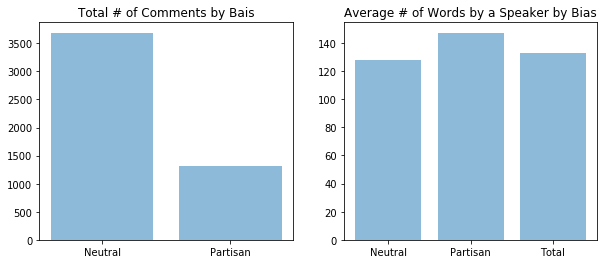

In [46]:
socAvg = getTotalAverages(cleanSoc, "text")

c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


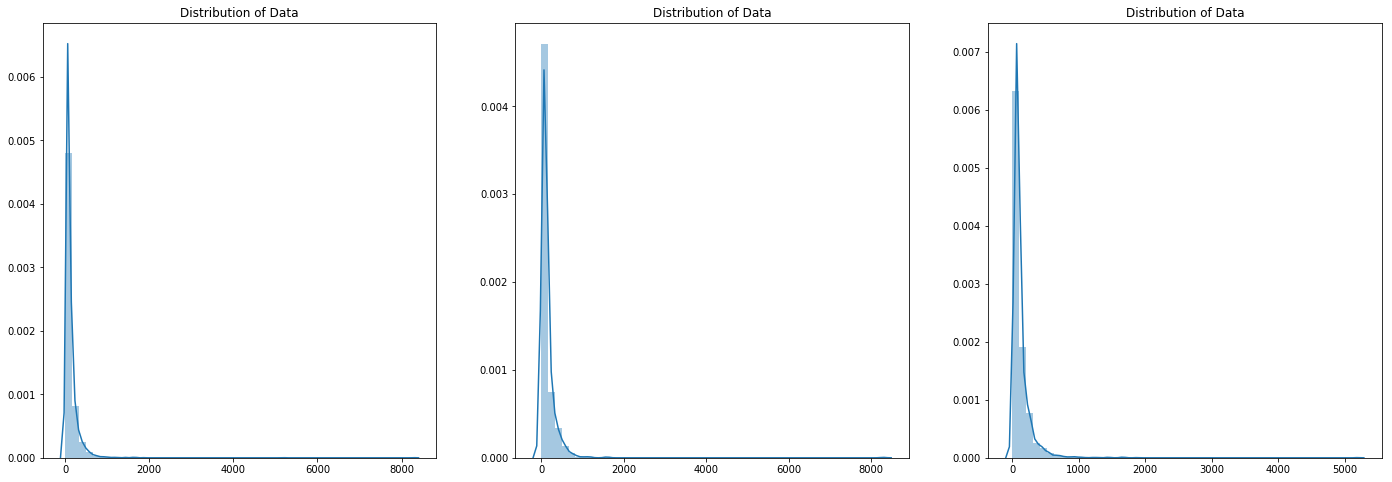

In [47]:
showDist(socAvg)

In [57]:
def getSentiment(df):
    #flesch_reading_ease
    #flesch_kincaid_grade
    dem_sent_neg = []
    dem_sent_pos = []
    dem_sent_neu = []
    dem_sent_compound = []
    repub_sent_neg = []
    repub_sent_pos = []
    repub_sent_neu = []
    repub_sent_compound = []
    for index, row in df.iterrows():
        text = row["text"]
        if row["bias"] == "partisan": 
            #dems
            tempdic = (nltk_sentiment(text))
            if len(tempdic) > 0:
                dem_sent_neg.append((tempdic['neg']))
                dem_sent_pos.append((tempdic['pos']))
                dem_sent_neu.append((tempdic['neu']))
                dem_sent_compound.append((tempdic['compound']))
        else: 
            #repub
            tempdic = (nltk_sentiment(text))
            if len(tempdic) > 0:
                repub_sent_neg.append((tempdic['neg']))
                repub_sent_pos.append((tempdic['pos']))
                repub_sent_neu.append((tempdic['neu']))
                repub_sent_compound.append((tempdic['compound']))
                
    dem = [np.average(dem_sent_neg), np.average(dem_sent_pos), np.average(dem_sent_neu), np.average(dem_sent_compound)]
    repub = [np.average(repub_sent_neg), np.average(repub_sent_pos), np.average(repub_sent_neu), np.average(repub_sent_compound)]
    print("Partiasn Sentiment Negitive (Mean, Standard Distorbution):", np.average(dem_sent_neg), np.std(dem_sent_neg))
    print("Partiasn Sentiment Positive (Mean, Standard Distorbution):", np.average(dem_sent_pos), np.std(dem_sent_pos))
    print("Partiasn Sentiment Neutral (Mean, Standard Distorbution):", np.average(dem_sent_neu), np.std(dem_sent_neu))
    print("Partiasn Sentiment Compound (Mean, Standard Distorbution):", np.average(dem_sent_compound), np.std(dem_sent_compound))
    print("Neutral Sentiment Negitive (Mean, Standard Distorbution):", np.average(repub_sent_neg), np.std(repub_sent_neg))
    print("Neutral Sentiment Positive (Mean, Standard Distorbution):", np.average(repub_sent_pos), np.std(repub_sent_pos))
    print("Neutral Sentiment Neutral (Mean, Standard Distorbution):", np.average(repub_sent_neu), np.std(repub_sent_neu))
    print("Neutral Sentiment Compound (Mean, Standard Distorbution):", np.average(repub_sent_compound), np.std(repub_sent_compound))
    categorical_1 = ['Neg', 'Pos', 'Neu', 'Comp']
    colors        = ['blue', 'red']
    numerical = [dem, repub]
    number_groups = len(numerical) 
    bin_width = 1.0/(number_groups+1)
    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(number_groups):
        ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
               height=numerical[i],
               width=bin_width,
               color=colors[i],
               align='center')
    ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
    # number_groups/(2*(number_groups+1)): offset of xticklabel
    ax.set_xticklabels(categorical_1)
    ax.legend(['Partisan', 'Neutral'], facecolor='w')
    ax.set_title("Averages of Sentiment Across Bias")
    plt.show()
    return dem_sent_neg, dem_sent_pos, dem_sent_neu, dem_sent_compound, repub_sent_neg, repub_sent_pos, repub_sent_neu, repub_sent_compound

Partiasn Sentiment Negitive (Mean, Standard Distorbution): 0.11699847444698702 0.13818118418240244
Partiasn Sentiment Positive (Mean, Standard Distorbution): 0.16856750572082382 0.16548821462745475
Partiasn Sentiment Neutral (Mean, Standard Distorbution): 0.7121411136536995 0.19115113347988244
Partiasn Sentiment Compound (Mean, Standard Distorbution): 0.10939267734553776 0.49765636129331237
Neutral Sentiment Negitive (Mean, Standard Distorbution): 0.060809704526972076 0.11513288186232967
Neutral Sentiment Positive (Mean, Standard Distorbution): 0.23929167796150722 0.20149012660191892
Neutral Sentiment Neutral (Mean, Standard Distorbution): 0.6969086473298997 0.21071719571978798
Neutral Sentiment Compound (Mean, Standard Distorbution): 0.34009972892382756 0.46302175064109763


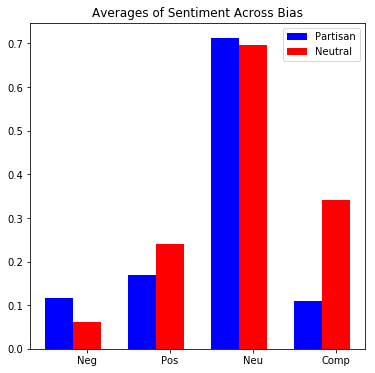

In [58]:
sentimentScores = getSentiment(cleanSoc)

c:\users\taber fisher\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


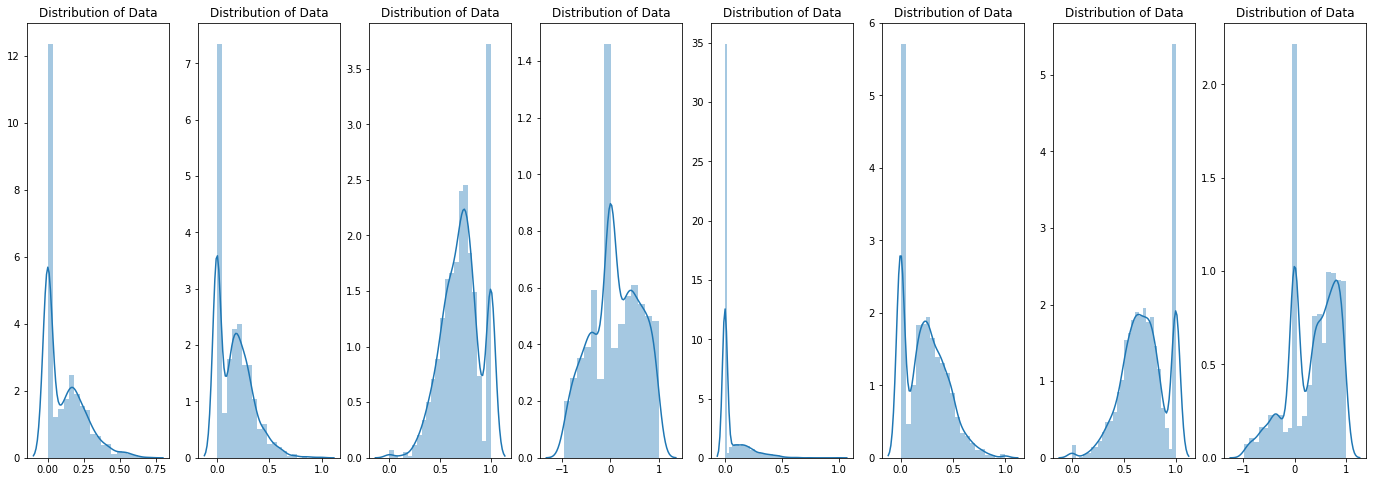

In [59]:
showDist(sentimentScores)

In [60]:
print("Social Media P-values:")
#Compound Sentiment
stat, p = mannwhitneyu(socAvg[1], socAvg[2])
print("Average Word p-value:", p)

#Compound Sentiment
stat, p = mannwhitneyu(sentimentScores[3], sentimentScores[7])
print("Compound Sentiment p-value:", p)

#Negitive Sentiment
stat, p = mannwhitneyu(sentimentScores[0], sentimentScores[4])
print("Negitive Sentiment p-value:", p)

#Positive Sentiment
stat, p = mannwhitneyu(sentimentScores[1], sentimentScores[5])
print("Positive Sentiment p-value:", p)

#Neutral Sentiment
stat, p = mannwhitneyu(sentimentScores[2], sentimentScores[6])
print("Neutral Sentiment p-value:", p)

Social Media P-values:
Average Word p-value: 8.177567705149212e-05
Compound Sentiment p-value: 2.8033060766855133e-47
Negitive Sentiment p-value: 1.9382792737149504e-58
Positive Sentiment p-value: 1.297024499814971e-28
Neutral Sentiment p-value: 0.007751693275430354
